<div class="alert alert-block alert-danger"><b>Info:</b> This dataset is intendet to grow over time and the authors would like to include neutron reflectometry (NR) data in the near future.</div>


# Single layer fits of XRR measurements of softmatter thinfilms

This is a compiled dataset of raw X-ray reflectivity (XRR, reflectometry) measurements together with corresponding fit parameters, intentionally published to use as training or test data for machine learning models.

## Authors & Contributors

- Alesandro Greco
- Linus Pithan
- Stefan Kowarik
- Ingrid Dax
- Nadine Rußegger
- Alexander Gerlach
- Alexander Hinderhofer
- Frank Schreiber

The initial dataset has been compiled by A. Greco and prepared for publication by L. Pithan.

## Data structure

All data is provided in an hdf5 file, following [NeXus](https://www.nexusformat.org/) convention with respect to the provided metadata in the hdf5 attributes. The datesets have been measured _in-situ_ and therefore there are always stacks of curves that correspond to the different layer thicknesses of the same material on top of $SiO_x$. The measured data is provided under `experimental` and the corresponding fit parameters under `fit`. Additional information is collected in `metadata`.

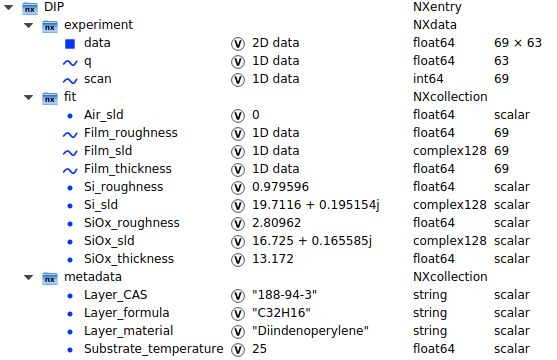

### Layer model
The following model was used:

|Air||
| :- ||
|layer 1: thickness, roughness and SLD fitted  ||
|$SiO_x$: thickness, roughness and SLD kept constant for each stack  ||
|$Si$: roughness and SLD kept constant  ||


### Limited q-range of fits
🔴 For all provided fits the q-range during fitting was limited form $q_{min} = 0.02 {\mathring{A}}^{-1}$ to $q_{max} = 0.15 {\mathring{A}}^{-1}$.

## How to cite this data

The dataset itself can be cited via the zenodo:
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6497438.svg)](https://doi.org/10.5281/zenodo.6497438)

Please consider also citing the following publication, where this dataset is initially described: "Machine Learning for Scattering Data: Strategies, Perspectives, and Applications to Surface Scattering" by Alexander Hinderhofer, Alessandro Greco, Vladimir Starostin, Valentin Munteanu, Linus Pithan, Alexander Gerlach and
Frank Schreiber (in preparation).

Dataset version: 1.0

## Where to find the dataset and how to contribute

Have a look at [github](https://github.com/schreiber-lab/reflectometry-dataset) and [zenodo](https://doi.org/10.5281/zenodo.6497438). In case you wish to contribute further curves to this dataset or have ideas how to improve the dataset or where else to deposit it, please contact the authors at softmatter AT ifap.uni-tuebingen.de.

# Interactive presentation of the data
In the following you find some plots presenting the provided experimental data & fits. Most of the dataset were measured _insitu_ therefore there are many measured XRR curves of the same sample while the thin film was still growing (prepared via OMBD). Use the slider to browse through the stacks of curves.

### Software requirements
The html version of this documentation contains interactive plots without the need to install additional software.

#### Read the NeXus hdf5 file
To work with the provided dataset any software package / library that supports `hdf5` can be used. We suggest to have a look at the [h5py](https://docs.h5py.org) or [silx](http://www.silx.org) packages when working with python. To inspect the file manually have a look at [silx view](http://www.silx.org/doc/silx/latest/applications/view.html). An example how to extract the provided data into simple txt file is provided at the bottom of this notebook.

#### Gererate XRR curves
The example code provided together with dataset uses the [refl1d](https://pypi.org/project/refl1d/) python package, which is also used in our machine learning XRR package [mlreflect](https://github.com/schreiber-lab/mlreflect).

#### Run this notebook
Together with the dataset there is a `requirements.txt` for `pip` or `conda` (please note that `relf1d` is currently only available trough pip). Further we provide an dump of the conda environment use to run this notebook in `conda_env.yml`, that can be used to recreate the respective [conda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file).

In [1]:
#prepare jupyter notebook for plots shown below
%run prepare_plot.py

#imports
from silx.io.dictdump import nxtodict     #read NeXus hdf5 to python dict
import numpy as np
import pandas as pd
from IPython.display import display

#use same q_range as during fitting
q_fit = np.linspace(0.02,0.15,130,endpoint=False)

#produce plots
for key, ds in nxtodict("xrr_dataset.h5").items():
    if "@" not in key:   #skip nexus attributes
        
        print("Dataset: ",key)
        print("Experimentalists: ",ds["metadata"].pop("Experimentalists","?"))
        ds["metadata"].pop("@NX_class", "")
        display(pd.DataFrame.from_dict({"Dataset":[key],**ds["metadata"]}))
        
        fig = prepare_figure(ds,q_fit,str(ds["metadata"]["Layer_material"])+" on SiOx")
        fig.show()        

Dataset:  DIP_1
Experimentalists:  ['Kowark, Stefan']


Dataset Layer_CAS Layer_formula    Layer_material  Substrate_temperature  \
0   DIP_1  188-94-3        C32H16  Diindenoperylene                    303   

  Substrate_temperature@unit   instrument  q_max_fit q_max_fit@unit  \
0                          K  ESRF, ID10b       0.15          1/Ang   

   year_experiment  
0             2005

Dataset:  DIP_2
Experimentalists:  ['Hinderhofer, Alexander']


Dataset Layer_CAS Layer_formula    Layer_material  Substrate_temperature  \
0   DIP_2  188-94-3        C32H16  Diindenoperylene                    303   

  Substrate_temperature@unit   instrument  q_max_fit q_max_fit@unit  \
0                          K  ESRF, ID10b       0.15          1/Ang   

   year_experiment  
0             2010

Dataset:  DIP_3
Experimentalists:  ['Lorch, Christopher']


Dataset Layer_CAS Layer_formula    Layer_material  Substrate_temperature  \
0   DIP_3  188-94-3        C32H16  Diindenoperylene                    303   

  Substrate_temperature@unit  instrument  q_max_fit q_max_fit@unit  \
0                          K  SLS, MXX04       0.15          1/Ang   

   year_experiment  
0             2012

Dataset:  DNTT_PDIF_1to2
Experimentalists:  ['Rußegger, Nadine' 'Greco, Alessandro']


Dataset   Layer_material instrument  q_max_fit q_max_fit@unit  \
0  DNTT_PDIF_1to2  DNTT PDIF (1:2)  DESY, P08       0.15          1/Ang   

   year_experiment  
0             2021

Dataset:  DNTT_PDIF_2to1
Experimentalists:  ['Rußegger, Nadine' 'Greco, Alessandro']


Dataset   Layer_material instrument  q_max_fit q_max_fit@unit  \
0  DNTT_PDIF_2to1  DNTT PDIF (2:1)  DESY, P08       0.15          1/Ang   

   year_experiment  
0             2021

Dataset:  PDIC5
Experimentalists:  ['Rußegger, Nadine' 'Greco, Alessandro']


Dataset Layer_material  Substrate_temperature Substrate_temperature@unit  \
0   PDIC5          PDIC5                    303                          K   

   q_max_fit q_max_fit@unit  
0       0.15          1/Ang

Dataset:  PDIC8
Experimentalists:  ['Rußegger, Nadine' 'Greco, Alessandro']


Dataset Layer_material  Substrate_temperature Substrate_temperature@unit  \
0   PDIC8          PDIC8                    303                          K   

   q_max_fit q_max_fit@unit  
0       0.15          1/Ang

Dataset:  PDIC8CN2_DIP_1to1
Experimentalists:  ['Rußegger, Nadine' 'Greco, Alessandro']


Dataset      Layer_material  Substrate_temperature  \
0  PDIC8CN2_DIP_1to1  PDIC8CN2 DIP (1:1)                    303   

  Substrate_temperature@unit  q_max_fit q_max_fit@unit  
0                          K       0.15          1/Ang

Dataset:  PEN_1
Experimentalists:  ['Dax, Ingrid']


Dataset Layer_formula Layer_material  Substrate_temperature  \
0   PEN_1        C22H14      Pentacene                    300   

  Substrate_temperature@unit  instrument  q_max_fit q_max_fit@unit  \
0                          K  lab source       0.15          1/Ang   

   year_experiment  
0             2021

Dataset:  PEN_2
Experimentalists:  ['Dax, Ingrid']


Dataset Layer_formula Layer_material Substrate_temperature  instrument  \
0   PEN_2        C22H14      Pentacene                    LT  lab source   

   q_max_fit q_max_fit@unit  year_experiment  
0       0.15          1/Ang             2021

## Example how to export a single XRR curve from the dataset to plain text file (csv)

In [2]:
from silx.io.dictdump import h5todict     #read hdf5 to python dict, without taking NeXus metadata into account
import numpy as np
import pandas as pd

dataset_name = "PEN_2"
curve_index = 1

pen2 = h5todict("xrr_dataset.h5",path=dataset_name)

#export q and reflectivity curve
np.savetxt(f"PEN_2_curve_{curve_index}.txt",list(zip(pen2['experiment']['q'],pen2['experiment']['data'][curve_index])),header="#q in 1/Ang\trefl (norm.)")

#export fit parameters
fits=pd.DataFrame.from_dict(pen2["fit"])
fits.loc[curve_index:curve_index].to_csv("PEN_2_fit_parameters.txt")